In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_DATA_PATH = '../data/train.csv'
TEST_DATA_PATH = '../data/test.csv'
SUBMISSION_DATA_PATH =  '../data/submission.csv'

In [3]:
df = pd.read_csv(TRAIN_DATA_PATH)

df.set_index('id', inplace=True)

df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
df.shape

(600000, 24)

In [5]:
df.isna().sum()

bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

In [6]:
def display_distribution(df):
    plt.figure()
    sns.countplot(df, order=df.value_counts().index)
    plt.show()

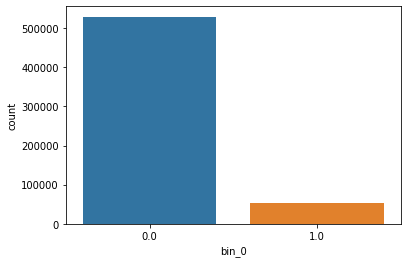

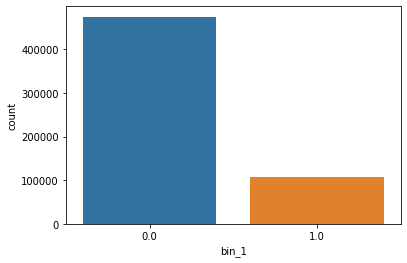

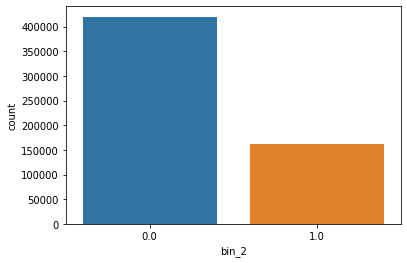

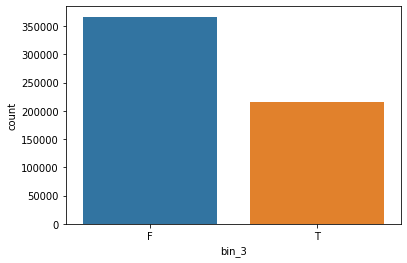

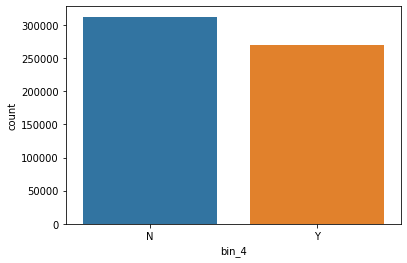

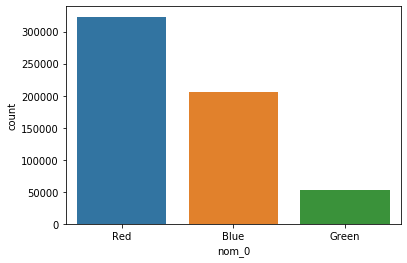

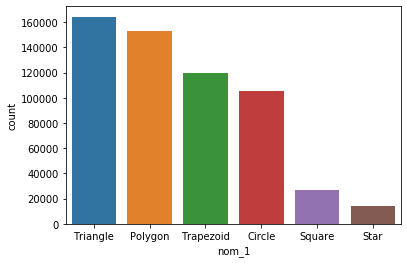

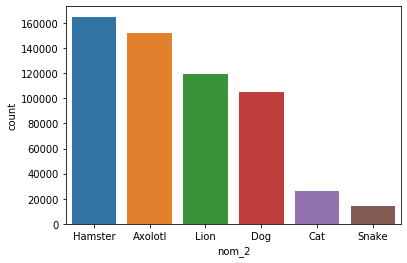

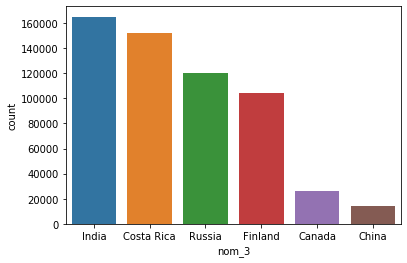

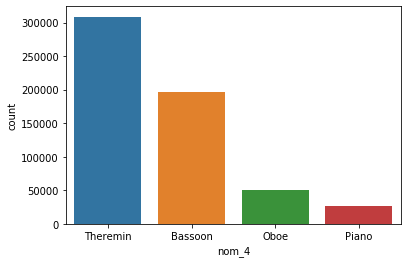

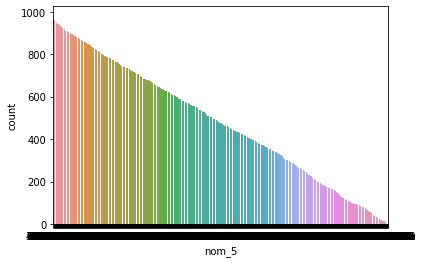

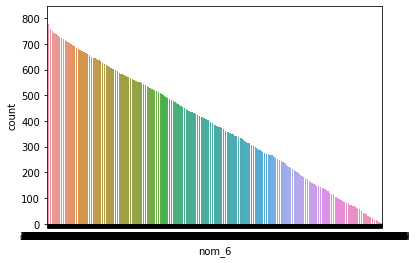

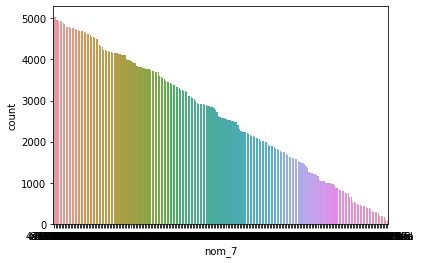

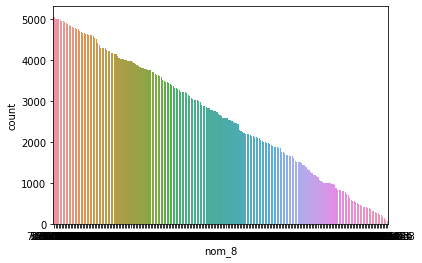

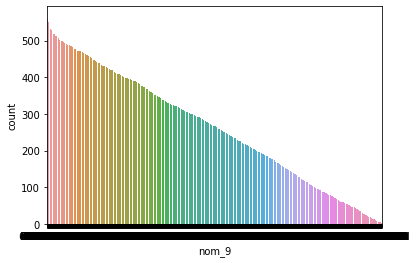

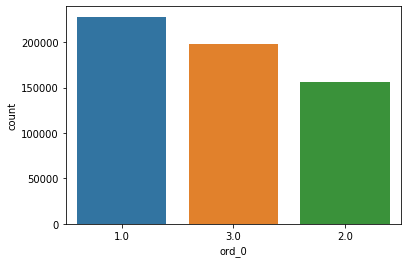

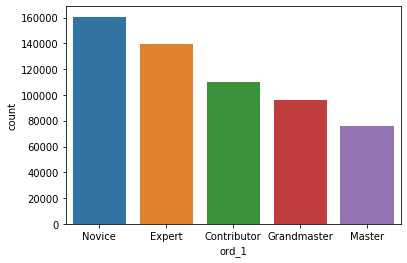

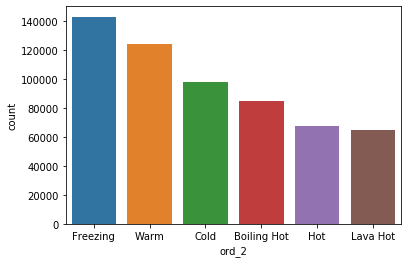

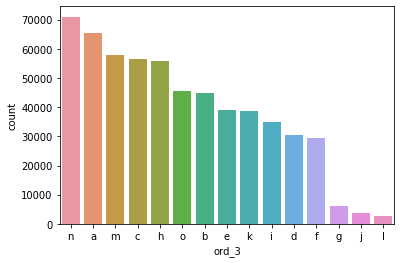

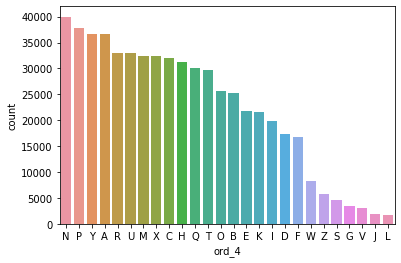

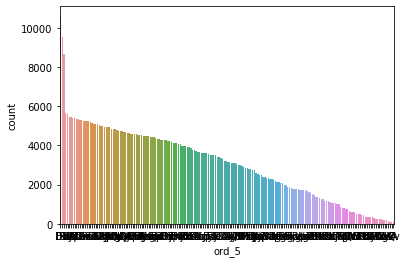

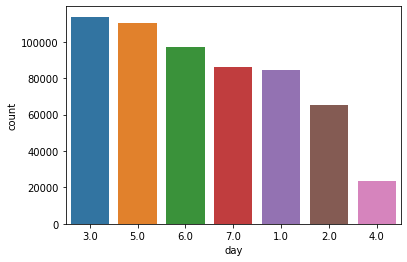

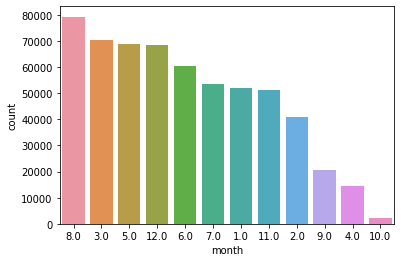

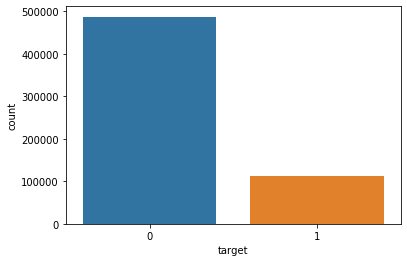

bin_0     None
bin_1     None
bin_2     None
bin_3     None
bin_4     None
nom_0     None
nom_1     None
nom_2     None
nom_3     None
nom_4     None
nom_5     None
nom_6     None
nom_7     None
nom_8     None
nom_9     None
ord_0     None
ord_1     None
ord_2     None
ord_3     None
ord_4     None
ord_5     None
day       None
month     None
target    None
dtype: object

In [7]:
df.apply(lambda col: display_distribution(col), axis=0)

#### After displaying the distribution of each column, we observe that following columns has great amount unique values: 
#### ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_5']
#### For the visualization purposes, we omit them from dataframe for the label-grouped histograms

In [8]:
drop_cols = ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_5']

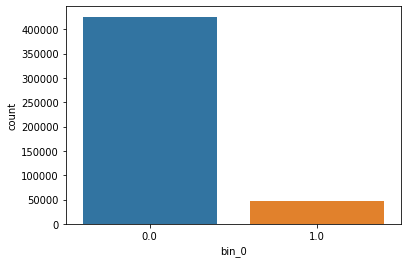

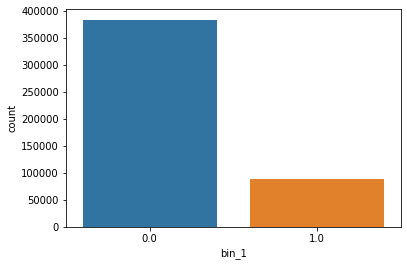

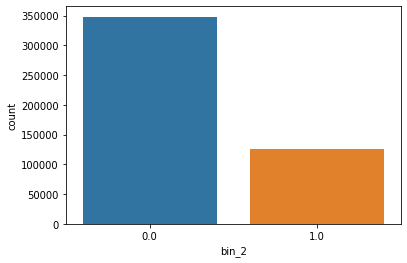

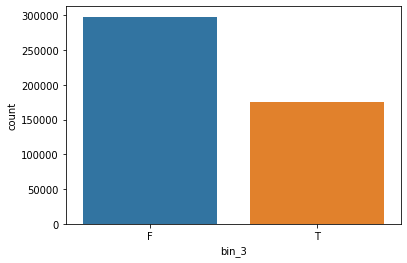

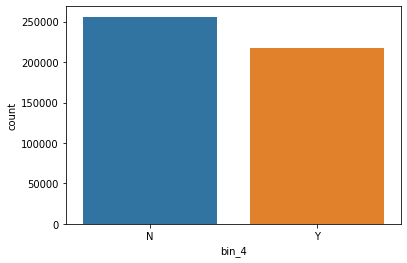

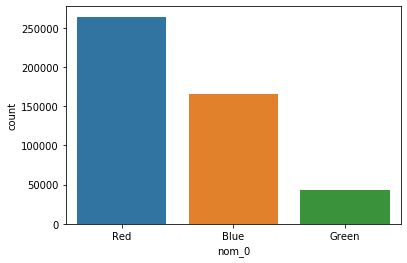

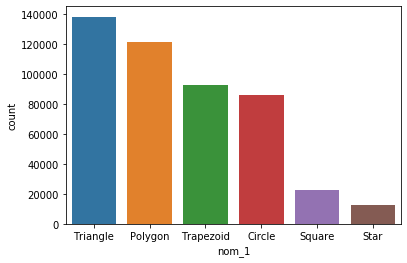

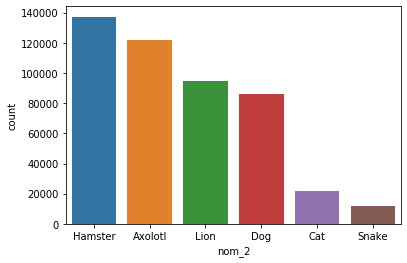

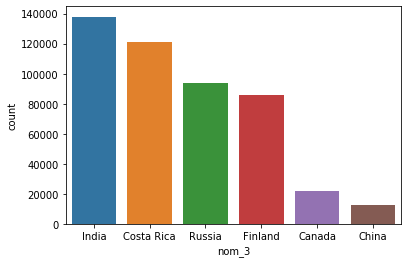

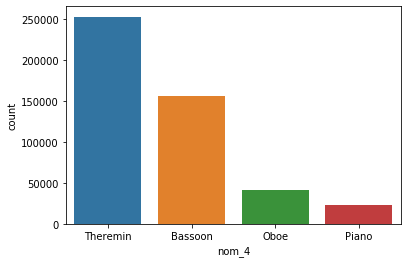

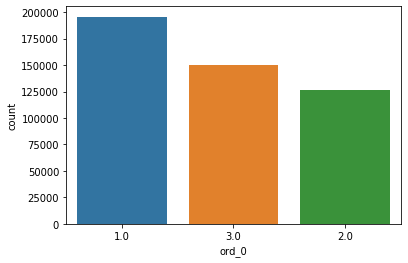

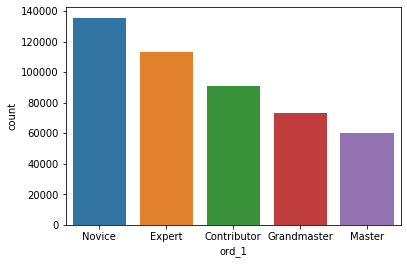

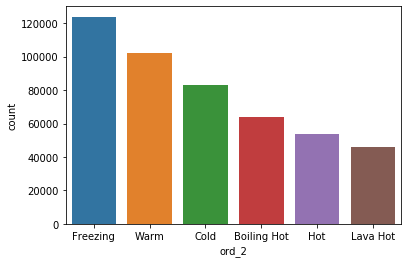

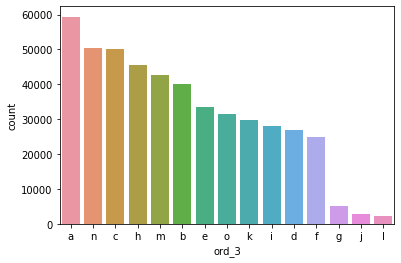

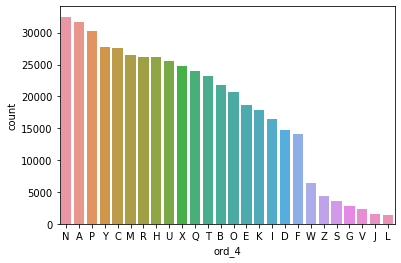

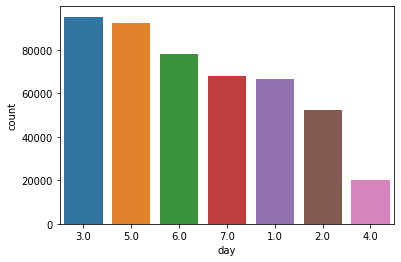

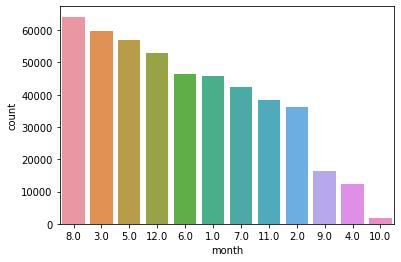

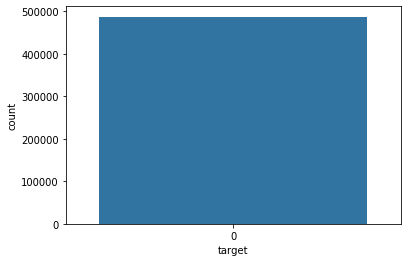

bin_0     None
bin_1     None
bin_2     None
bin_3     None
bin_4     None
nom_0     None
nom_1     None
nom_2     None
nom_3     None
nom_4     None
ord_0     None
ord_1     None
ord_2     None
ord_3     None
ord_4     None
day       None
month     None
target    None
dtype: object

In [9]:
df.drop(columns=drop_cols).groupby('target').get_group(0).apply(lambda col: display_distribution(col), axis=0)

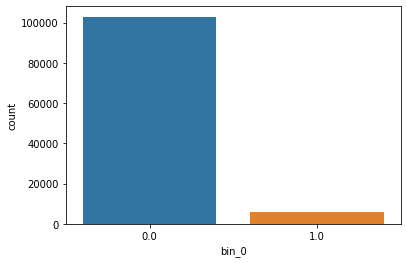

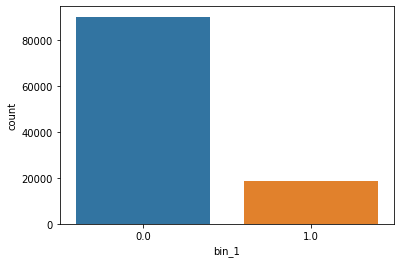

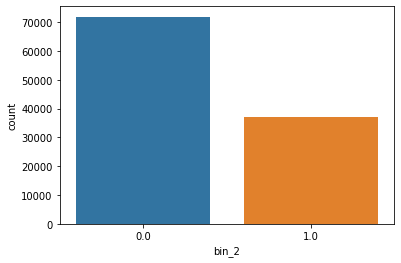

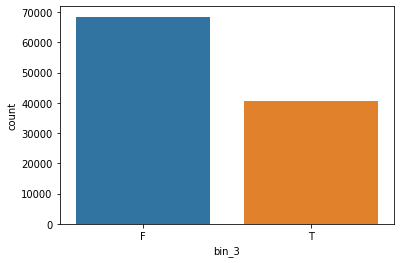

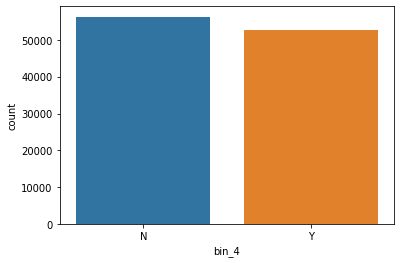

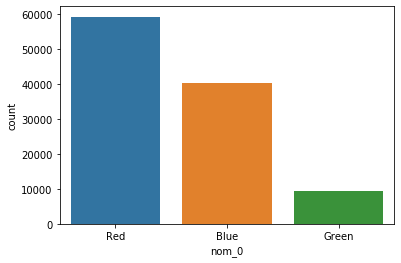

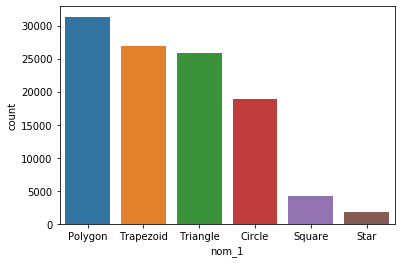

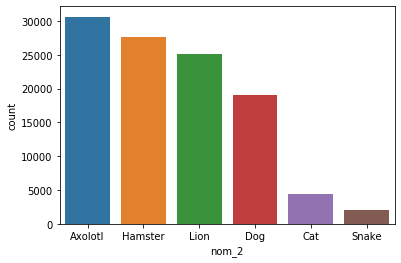

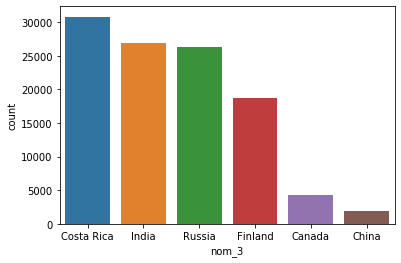

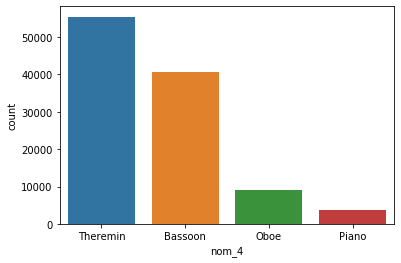

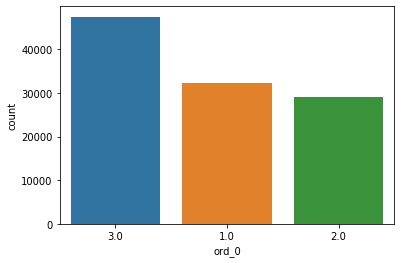

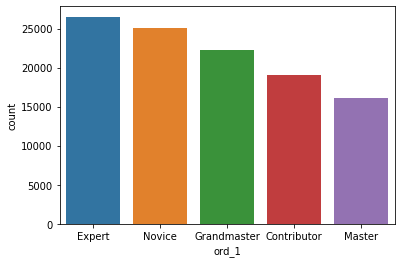

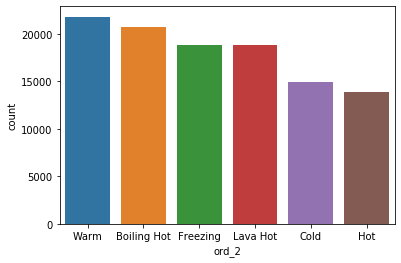

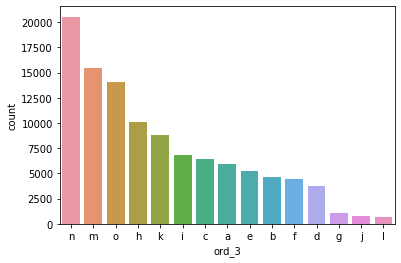

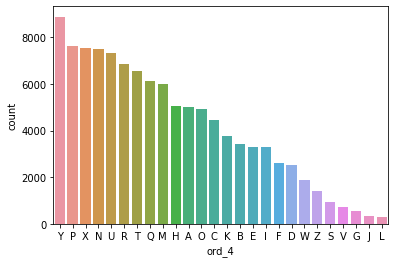

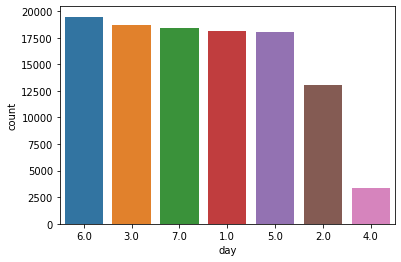

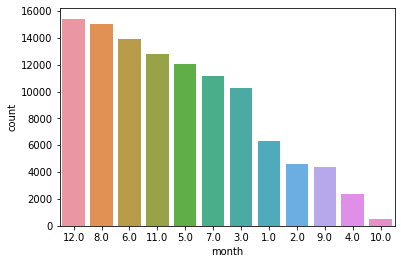

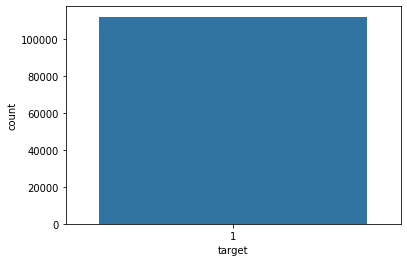

bin_0     None
bin_1     None
bin_2     None
bin_3     None
bin_4     None
nom_0     None
nom_1     None
nom_2     None
nom_3     None
nom_4     None
ord_0     None
ord_1     None
ord_2     None
ord_3     None
ord_4     None
day       None
month     None
target    None
dtype: object

In [10]:
df.drop(columns=drop_cols).groupby('target').get_group(1).apply(lambda col: display_distribution(col), axis=0)

#### After analyzing the histograms, we can eliminate the following features, because they have the similar distribution regardless of which class label they belong to:

#### 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_4'